CREDIT CARD FRAUD DETECTION: Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or
legitimate.

Qasim Hasan

CodSoft Internship Project Assignment @CodSoft

Project 3

https://www.kaggle.com/datasets/kartik2112/fraud-detection Downloaded csv file from the link provided

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading datasets
train = pd.read_csv('/content/fraudTrain.csv')
test = pd.read_csv('/content/fraudTest.csv')

In [3]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
print("Training Dataset Info:")
print(train.info())
print("\nTest Dataset Info:")
print(test.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64


In [6]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# Counting the number of fraud and not fraud transactions
fraud_counts_train = train['is_fraud'].value_counts()
fraud_counts_test = test['is_fraud'].value_counts()


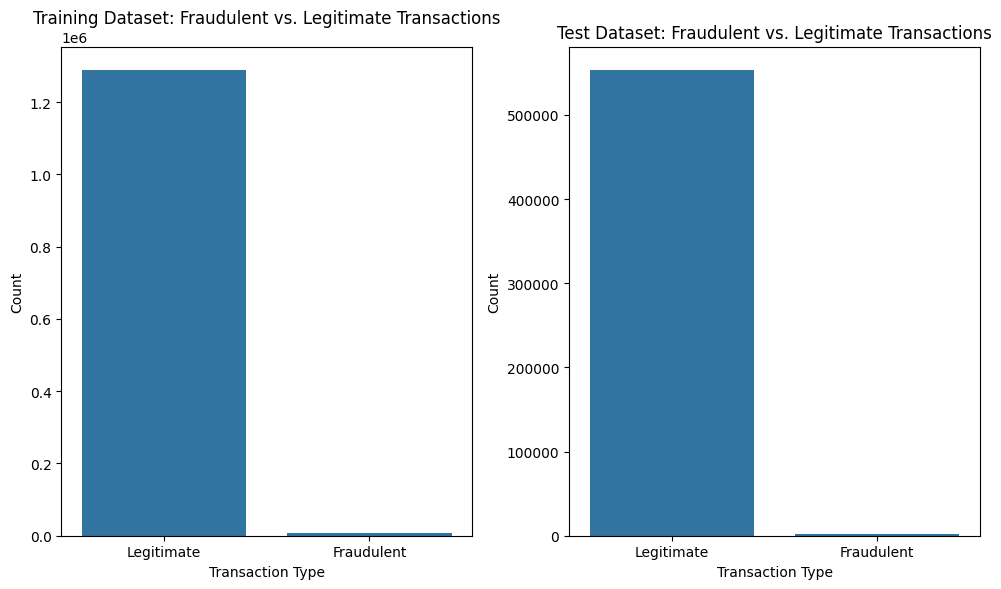

In [8]:

# Plotting the counts using a bar graph
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=fraud_counts_train.index, y=fraud_counts_train.values)
plt.title('Training Dataset: Fraudulent vs. Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])

plt.subplot(1, 2, 2)
sns.barplot(x=fraud_counts_test.index, y=fraud_counts_test.values)
plt.title('Test Dataset: Fraudulent vs. Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.show()

In [9]:
def data_pre(X):
    del_col=['merchant','first','last','street','zip','unix_time','Unnamed: 0','trans_num','cc_num']
    X.drop(columns=del_col,inplace=True)

    X['trans_date_trans_time']=pd.to_datetime(X['trans_date_trans_time'])
    X['trans_date']=X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    X['trans_date']=pd.to_datetime(X['trans_date'])
    X['dob']=pd.to_datetime(X['dob'])

    X["age"] = (X["trans_date"] - X["dob"]).dt.days //365
    X['trans_month']=X['trans_date'].dt.month
    X['trans_year']=X['trans_date'].dt.year

    X['gender']=X['gender'].apply(lambda x : 1 if x=='M' else 0)
    X['gender']=X['gender'].astype(int)

    X['lat_dis']=abs(X['lat']-X['merch_lat'])
    X['long_dis']=abs(X['long']-X['merch_long'])

    X=pd.get_dummies(X,columns=['category'])
    X=X.drop(columns=['city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])
    return X


In [10]:
train_df_pre=data_pre(train.copy())
train_df_pre.head()
test_df_pre=data_pre(test.copy())
test_df_pre.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,lat_dis,long_dis,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,1,333497,0,52,6,2020,0.020491,0.265214,False,...,False,False,False,False,False,False,True,False,False,False
1,29.84,0,302,0,30,6,2020,0.870202,0.475569,False,...,False,False,False,False,False,False,True,False,False,False
2,41.28,0,34496,0,49,6,2020,0.177090,0.659611,False,...,False,True,False,False,False,False,False,False,False,False
3,60.05,1,54767,0,32,6,2020,0.242698,0.063961,False,...,False,False,False,False,False,True,False,False,False,False
4,3.19,1,1126,0,65,6,2020,0.706248,0.867734,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
x_train=train_df_pre.drop('is_fraud',axis=1)
y_train=train_df_pre['is_fraud']
x_test=test_df_pre.drop('is_fraud',axis=1)
y_test=test_df_pre['is_fraud']

In [12]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred_logistic = logistic_regression.predict(x_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



In [13]:
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(x_train,y_train)
y_pred_dt = DecisionTree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.61      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719

